In [37]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [38]:
traj = pd.read_csv('/home/anahita/CDS245/HW2_new/simple-quad-sim/data/train2/custom_hover_baseline_10wind.csv')
traj.head()

,t,p,p_d,v,v_d,q,R,w,T_sp,q_sp,hover_throttle,fa,pwm
0,0.005,"[1.0, 0.0, 0.0]","[0, 0, 0]","[0.0, 0.0, 0.374846897157458]","[0, 0, 0]","[1.0, 0.0, 0.0, 0.0]","[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[0.0, -7.9874379431491604, 0.14993875886298322]",[9.81],"[0.9220337925653211, 0.0, -0.38710939715745796...",[0.5],"[0.0, 0.0, 0.0]","[282.62055734056503, 49.52272205765753, 0.0, 4..."
1,0.010,"[1.0, 0.0, 0.00187423448578729]","[0, 0, 0]","[0.0, 0.0, 0.6864319172900923]","[0, 0, 0]","[0.9998006170008298, 0.0, -0.01996461345954092...","[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[6.938893903907229e-19, -13.022827308593286, 0...",[6.061531028425421],"[0.871309234888426, 0.0, -0.4907343652100857, ...",[0.5],"[0.0, 0.0, 0.0]","[224.39673271783894, 104.33865624035421, 0.0, ..."
2,0.015,"[1.0, 0.0, 0.005306394072237751]","[0, 0, 0]","[-0.013528758167028799, -5.071213021304365e-06...","[0, 0, 0]","[0.9986211894704067, 1.8638001400844216e-06, -...","[[0.9992025475104798, -0.000749394871723589, -...","[-0.008988855927026813, -16.895640356434846, 0...",[3.323817867163948],"[0.8002838271052087, 0.0, -0.5996213772655545,...",[0.5],"[0.0, 0.0, 0.0]","[196.79464037014728, 120.70409823207046, 0.0, ..."
3,0.020,"[0.9999323562091649, -2.5356065106521824e-08, ...","[0, 0, 0]","[-0.04804296325352482, -3.7124143913916834e-05...","[0, 0, 0]","[0.995515830560453, -1.2606593749394297e-05, -...","[[0.9944885601255277, -0.0017816300647078833, ...","[-0.025429893538454235, -20.28360251920278, 0....",[1.031092948877792],"[0.7069977597746161, -3.6356274259652985e-06, ...",[0.5],"[0.0, 0.0, 0.0]","[184.06417801321183, 126.75318679398838, 0.0, ..."
4,0.025,"[0.9996921413928973, -2.1097678467610602e-07, ...","[0, 0, 0]","[-0.10781888822143254, -0.00011650804518350044...","[0, 0, 0]","[0.9894472535520372, -5.650655300603328e-05, -...","[[0.9821035381107893, -0.0028940823045166897, ...","[-0.04759654207973818, -23.315106368451445, 0....",[0.0],"[0.5977066431634042, -3.1288621951922035e-05, ...",[0.5],"[0.0, 0.0, 0.0]","[174.11214343774714, 129.209368648472, 0.0, 12..."


<class 'pandas.core.series.Series'>


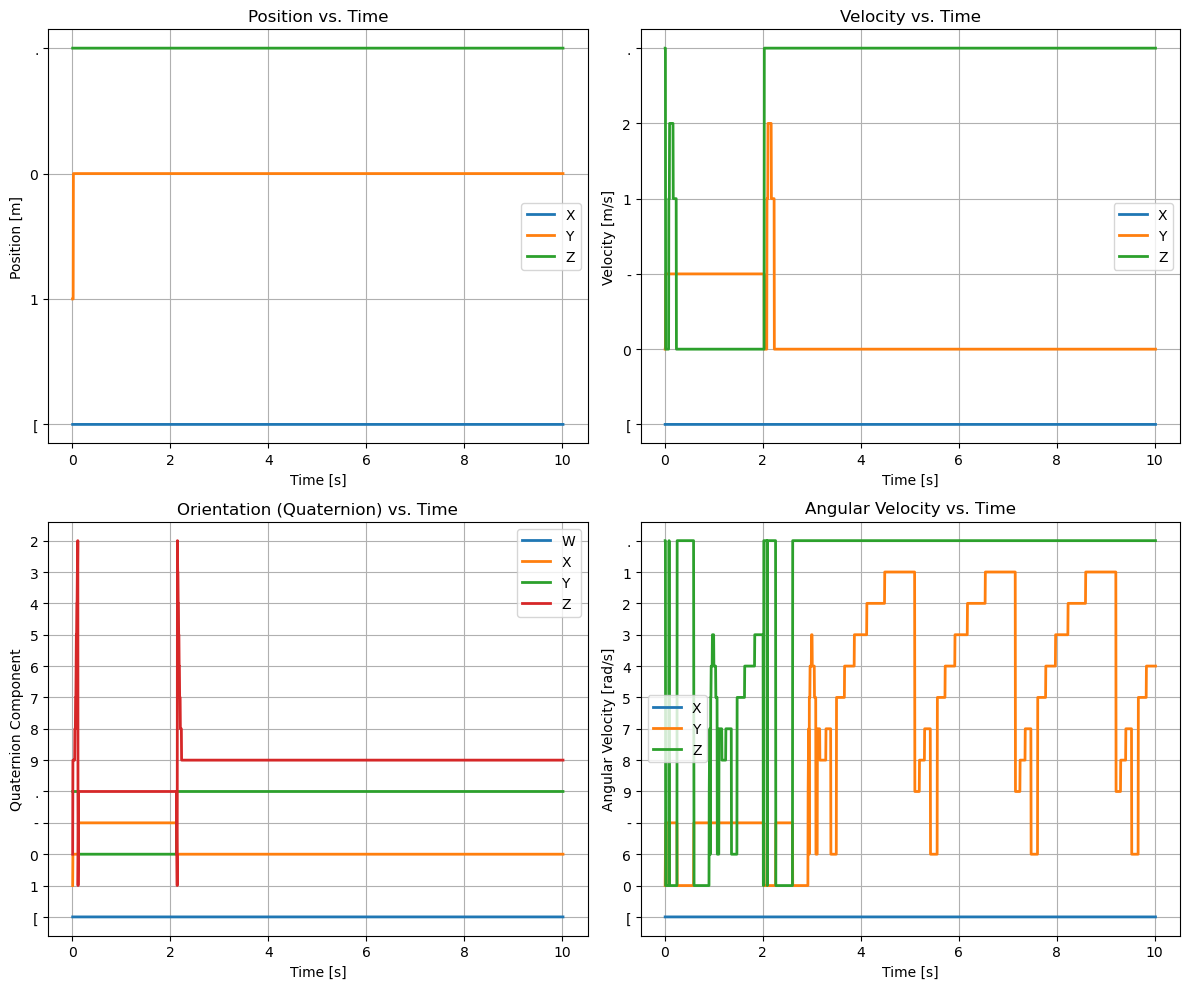

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten() 

# ----- Position Plot -----
print(type(traj['p']))
traj['p'].head()
axs[0].plot(traj['t'], traj['p'].apply(lambda x: x[0]), label='X', lw=2)
axs[0].plot(traj['t'], traj['p'].apply(lambda x: x[1]), label='Y', lw=2)
axs[0].plot(traj['t'], traj['p'].apply(lambda x: x[2]), label='Z', lw=2)

axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Position [m]')
axs[0].set_title('Position vs. Time')
axs[0].legend()
axs[0].grid(True)

# ----- Velocity Plot -----
axs[1].plot(traj['t'], traj['v'].apply(lambda x: x[0]), label='X', lw=2)
axs[1].plot(traj['t'], traj['v'].apply(lambda x: x[1]), label='Y', lw=2)
axs[1].plot(traj['t'], traj['v'].apply(lambda x: x[2]), label='Z', lw=2)
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Velocity [m/s]')
axs[1].set_title('Velocity vs. Time')
axs[1].legend()
axs[1].grid(True)

# # ----- Orientation Plot (Quaternion) -----
axs[2].plot(traj['t'], traj['q'].apply(lambda x: x[0]), label='W', lw=2)
axs[2].plot(traj['t'], traj['q'].apply(lambda x: x[1]), label='X', lw=2)
axs[2].plot(traj['t'], traj['q'].apply(lambda x: x[2]), label='Y', lw=2)
axs[2].plot(traj['t'], traj['q'].apply(lambda x: x[3]), label='Z', lw=2)
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('Quaternion Component')
axs[2].set_title('Orientation (Quaternion) vs. Time')
axs[2].legend()
axs[2].grid(True)

# ----- Angular Velocity Plot -----
axs[3].plot(traj['t'], traj['w'].apply(lambda x: x[0]), label='X', lw=2)
axs[3].plot(traj['t'], traj['w'].apply(lambda x: x[1]), label='Y', lw=2)
axs[3].plot(traj['t'], traj['w'].apply(lambda x: x[2]), label='Z', lw=2)
axs[3].set_xlabel('Time [s]')
axs[3].set_ylabel('Angular Velocity [rad/s]')
axs[3].set_title('Angular Velocity vs. Time')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()

filename = "hover_baseline_10wind.png"

if filename:
    fig.savefig(filename)